In [155]:
#importações necessárias 
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [156]:
altura=38970   
massa=160 # QUilogramas
K = 0.35 # Produto entre Cd e a área do félix com a roupa
Cd=0.82

Area_trans_F=1.7*0.425 #área de um retângulo, em metros quadrados, consideradno altura e distÂncia entre ombros
area_trans_P= 48 # Metros Quadrados
G = 6.67 * 1e-11 # Constante gravitacional Universal
R = 6371 * 1e3 # Raio da Terra em metros
M = 5.98 * 1e24 # Em Kg




#Dados Iniciais


y0=altura
v_0=0

CI=[y0, v_0]

dt=1
tf=260
tempo=np.arange(0,tf,dt)





In [157]:
#implementando a função densidade em relação a altura
def densidade(h):
    a=-(h/8882)
    densidade_ar=1.225*(e**a)
    if densidade_ar<0:
        densidade_ar=0
    return densidade_ar    





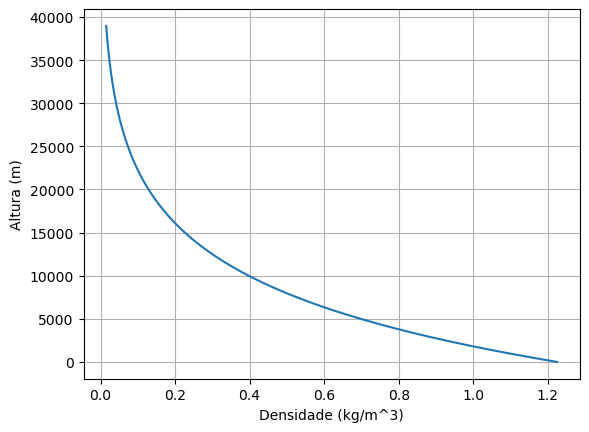

In [158]:
#plotando o gráfico
lista_densidade=[]
lista_altura=np.arange(0, altura, 1)
for i in lista_altura:
    lista_densidade.append(densidade(i))



plt.plot(lista_densidade, lista_altura)
plt.grid()
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Altura (m)')
plt.show()





In [159]:
def modelo(k, t_queda): 
    y = k[0]
    v = k[1]

    densi = densidade(y)
    
    F_arrasto = (1/2)*densi*K*(v**2)

    Peso = (G*M*massa)*(1/((R+y))**2)

    dydt = -v
    
    dvdt = (Peso - F_arrasto)/(massa)

    dkdt=[dydt, dvdt]
    return dkdt    

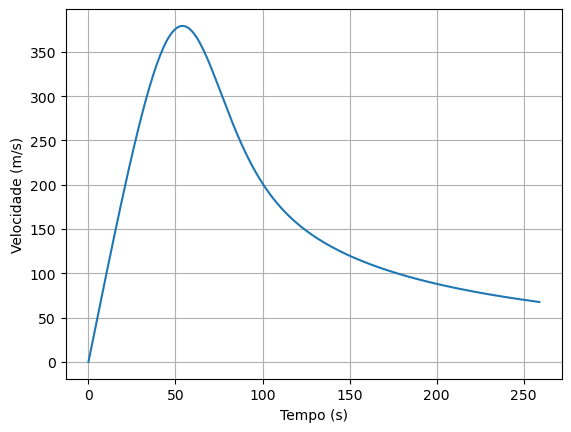

In [160]:
reso_numerica = odeint(modelo, CI, tempo)

lista_y =reso_numerica[:,0]
lista_v =reso_numerica[:,1]

plt.plot(tempo, lista_v)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()

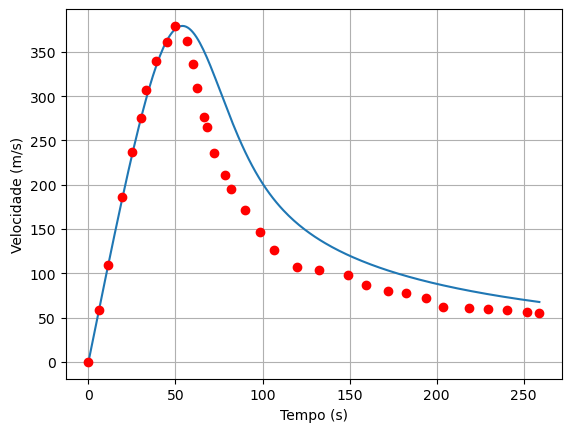

In [161]:
dados_reais = [0, 0,
5.93096234309623, 58.35714285714289,
11.29707112970711, 109.25000000000006,
19.20502092050209, 186.60714285714286,
25.135983263598323, 237.5,
29.937238493723843, 275.5,
33.04393305439329, 306.7142857142857,
38.97489539748953, 339.2857142857143,
44.90585774058576, 361,
49.98953974895396, 378.6428571428571,
56.767782426778226, 362.35714285714283,
59.87447698744769, 335.8928571428571,
62.416317991631786, 309.42857142857144,
66.0878661087866, 276.8571428571429,
68.34728033472803, 264.6428571428571,
72.3012552301255, 236.14285714285714,
78.51464435146441, 211.03571428571428,
81.62133891213387, 195.42857142857144,
89.81171548117153, 171.67857142857144,
98.28451882845187, 146.5714285714286,
106.47489539748952, 126.21428571428572,
120.03138075313805, 107.21428571428572,
132.45815899581586, 103.82142857142861,
149.12133891213387, 97.71428571428572,
159.28870292887026, 86.85714285714289,
171.99790794979074, 80.07142857142861,
182.44769874476984, 78.03571428571433,
194.02719665271962, 72.60714285714289,
203.62970711297066, 61.75,
218.31589958158992, 61.07142857142861,
229.61297071129704, 59.71428571428572,
240.6276150627615, 58.35714285714289,
251.64225941422592, 56.32142857142861,
258.70292887029285, 54.96428571428572
]

instante = []
velocidade = []
for i in range(len(dados_reais)):
    if i % 2 == 0:
        instante.append(dados_reais[i])
    else:
        velocidade.append(dados_reais[i])

plt.plot(tempo, lista_v, label = "Modelo")
plt.plot(instante, velocidade, 'ro', label = "Dados Reais")
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.show()

